In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import median_abs_deviation

In [7]:
df = pd.read_csv('/content/Bikeshare_Data.csv')
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Duration,Start date,End date,Start station number,Start station,End station number,End station,Member type,time,temperature_2m,relativehumidity_2m,precipitation,windspeed_10m,date,holiday,isHoliday
0,0,2123,2123,496,1/1/2015 18:00,1/1/2015 18:00,31616,3rd & H St NE,31614,11th & H St NE,Casual,1/1/2015 18:00,4.6,38,0.0,15.6,1/1/2015,New Year's Day,1
1,1,1692,1692,1067,1/1/2015 16:00,1/1/2015 16:00,31270,8th & D St NW,31222,New York Ave & 15th St NW,Casual,1/1/2015 16:00,2.8,38,0.0,11.7,1/1/2015,New Year's Day,1
2,2,1096,1096,992,1/1/2015 13:00,1/1/2015 14:00,31602,Park Rd & Holmead Pl NW,31200,Massachusetts Ave & Dupont Circle NW,Member,1/1/2015 13:00,-4.4,60,0.0,9.5,1/1/2015,New Year's Day,1
3,3,657,657,1007,1/1/2015 11:00,1/1/2015 12:00,31237,25th St & Pennsylvania Ave NW,31229,New Hampshire Ave & T St NW,Casual,1/1/2015 11:00,-4.5,56,0.0,7.3,1/1/2015,New Year's Day,1
4,4,2295,2295,346,1/1/2015 19:00,1/1/2015 19:00,31246,M St & Pennsylvania Ave NW,31255,24th & N St NW,Member,1/1/2015 19:00,5.2,39,0.0,16.4,1/1/2015,New Year's Day,1


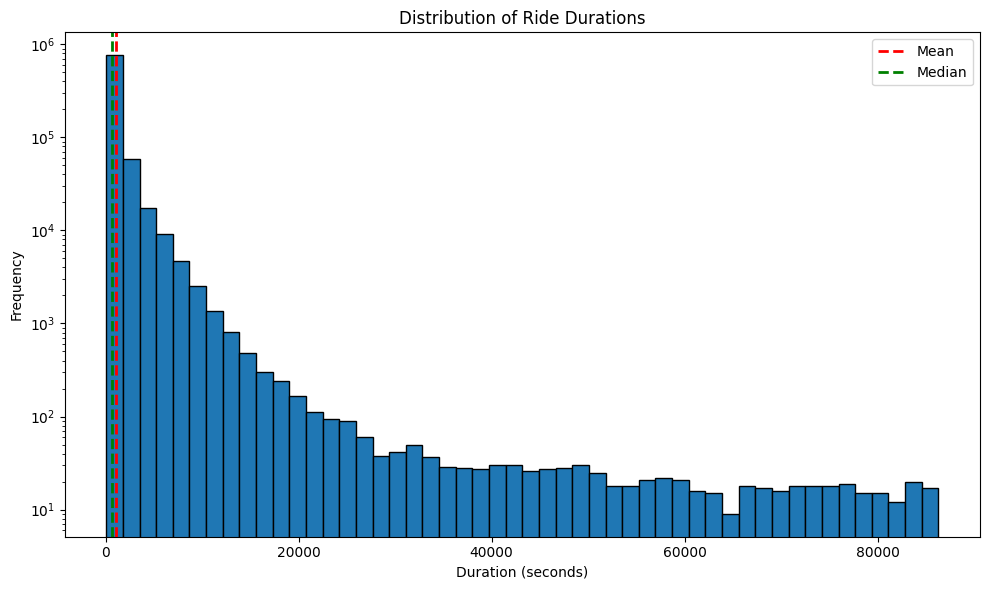

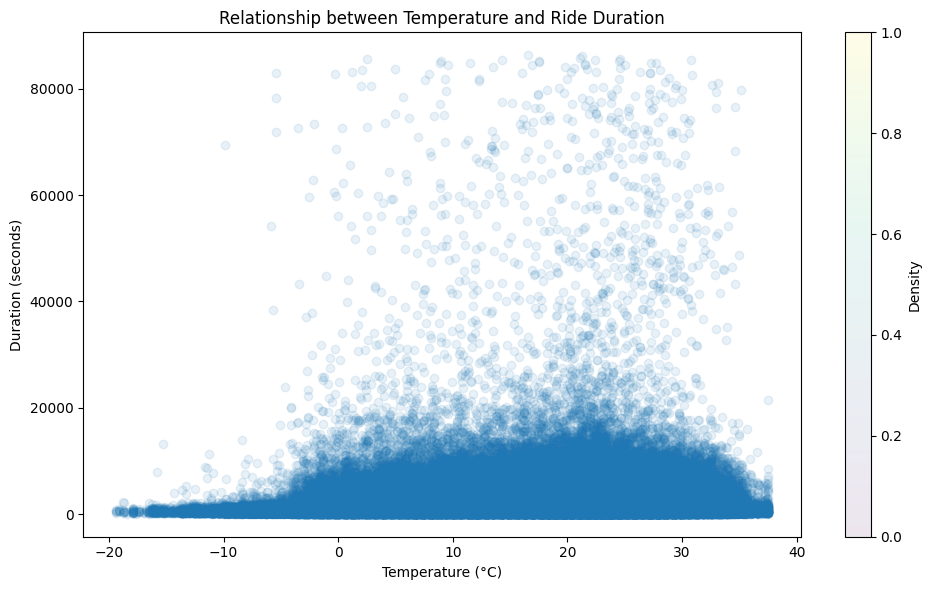

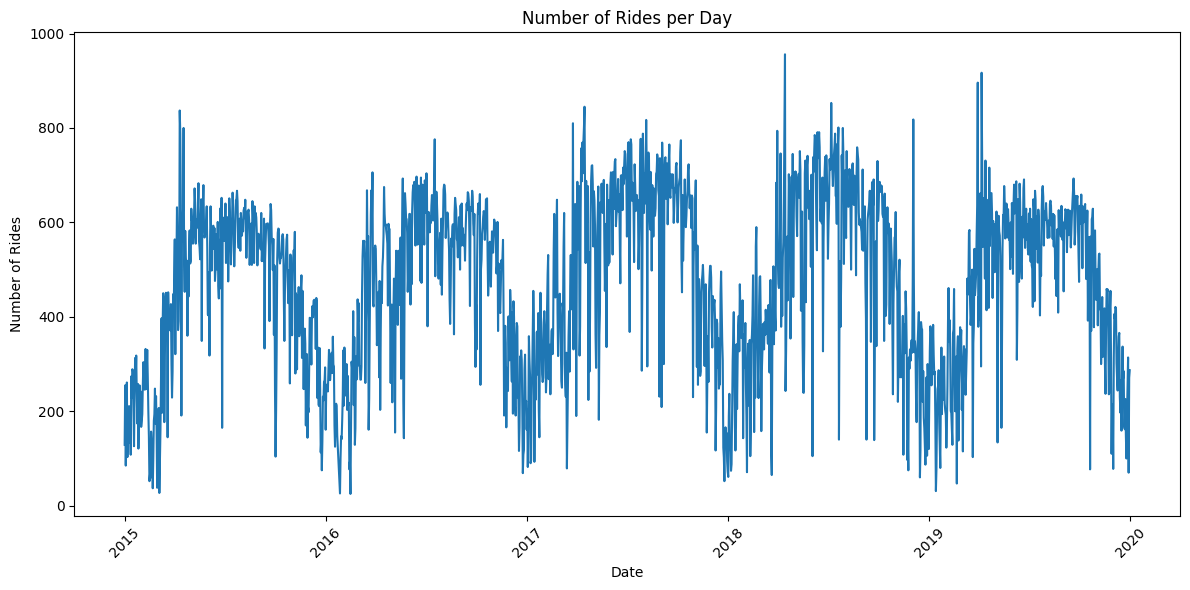

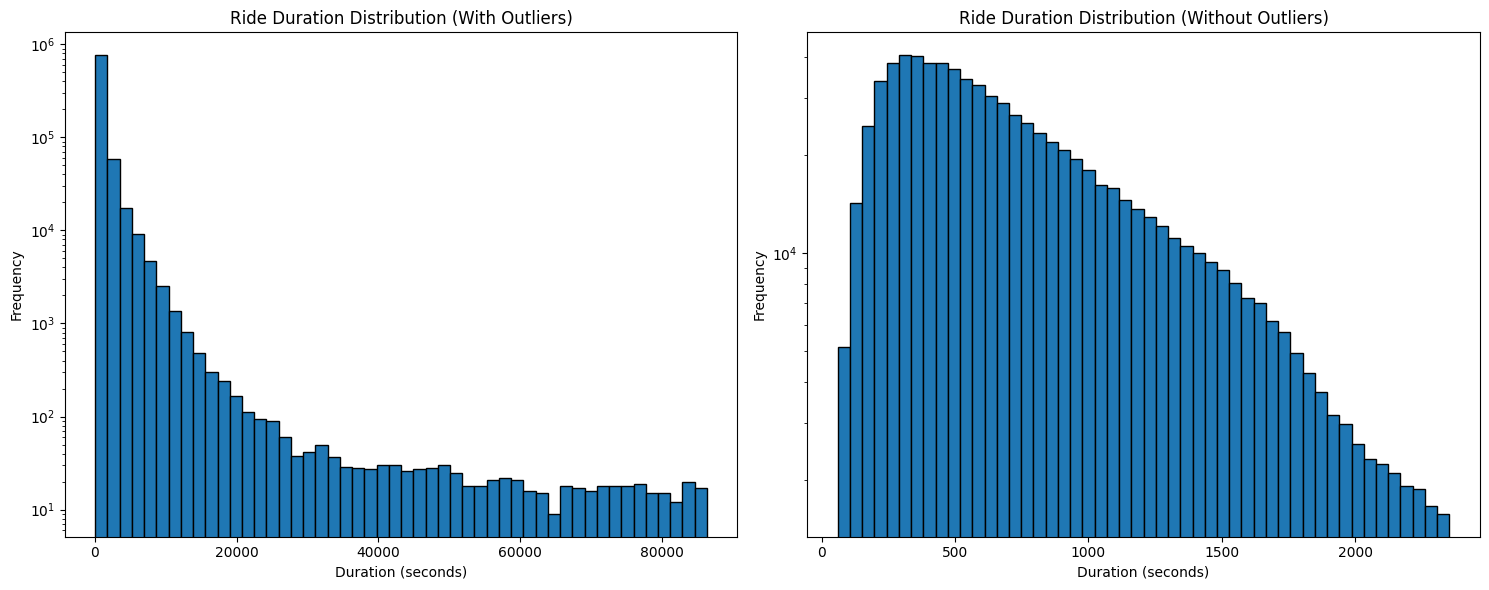

Number of rides before outlier removal: 860924
Number of rides after outlier removal: 796589
Percentage of data retained: 92.53%


In [8]:
# 1. Univariate analysis: Distribution of ride durations
plt.figure(figsize=(10, 6))
plt.hist(df['Duration'], bins=50, edgecolor='black')
plt.title('Distribution of Ride Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.yscale('log')  # Use log scale for better visualization
plt.axvline(df['Duration'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['Duration'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Bivariate analysis: Relationship between temperature and ride duration
plt.figure(figsize=(10, 6))
plt.scatter(df['temperature_2m'], df['Duration'], alpha=0.1)
plt.title('Relationship between Temperature and Ride Duration')
plt.xlabel('Temperature (°C)')
plt.ylabel('Duration (seconds)')
plt.colorbar(label='Density')
plt.tight_layout()
plt.show()

# 3. Time series analysis: Number of rides per day
df['date'] = pd.to_datetime(df['date'])
daily_rides = df.groupby('date').size().reset_index(name='count')
plt.figure(figsize=(12, 6))
plt.plot(daily_rides['date'], daily_rides['count'])
plt.title('Number of Rides per Day')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Impact of removing outliers: Compare ride duration distribution before and after outlier removal
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['Duration'] >= lower_bound) & (df['Duration'] <= upper_bound)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.hist(df['Duration'], bins=50, edgecolor='black')
ax1.set_title('Ride Duration Distribution (With Outliers)')
ax1.set_xlabel('Duration (seconds)')
ax1.set_ylabel('Frequency')
ax1.set_yscale('log')

ax2.hist(df_no_outliers['Duration'], bins=50, edgecolor='black')
ax2.set_title('Ride Duration Distribution (Without Outliers)')
ax2.set_xlabel('Duration (seconds)')
ax2.set_ylabel('Frequency')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

print(f"Number of rides before outlier removal: {len(df)}")
print(f"Number of rides after outlier removal: {len(df_no_outliers)}")
print(f"Percentage of data retained: {len(df_no_outliers) / len(df) * 100:.2f}%")



Descriptive Statistics for Numerical Columns:
               Duration  temperature_2m  relativehumidity_2m  precipitation  \
count     860924.000000   860924.000000        860924.000000  860924.000000   
mean        1120.725674       17.405877            67.262539       0.094176   
std         2188.043696        9.456243            19.859662       0.463163   
min           60.000000      -19.400000            18.000000       0.000000   
25%          403.000000       10.500000            50.000000       0.000000   
50%          692.000000       19.100000            67.000000       0.000000   
75%         1183.000000       24.600000            85.000000       0.000000   
max        86305.000000       37.500000           100.000000      17.700000   
mode         320.000000       24.400000            98.000000       0.000000   
mad          345.000000        6.700000            17.000000       0.000000   
skewness      17.142465       -0.447306            -0.045834       8.992255   
kurto

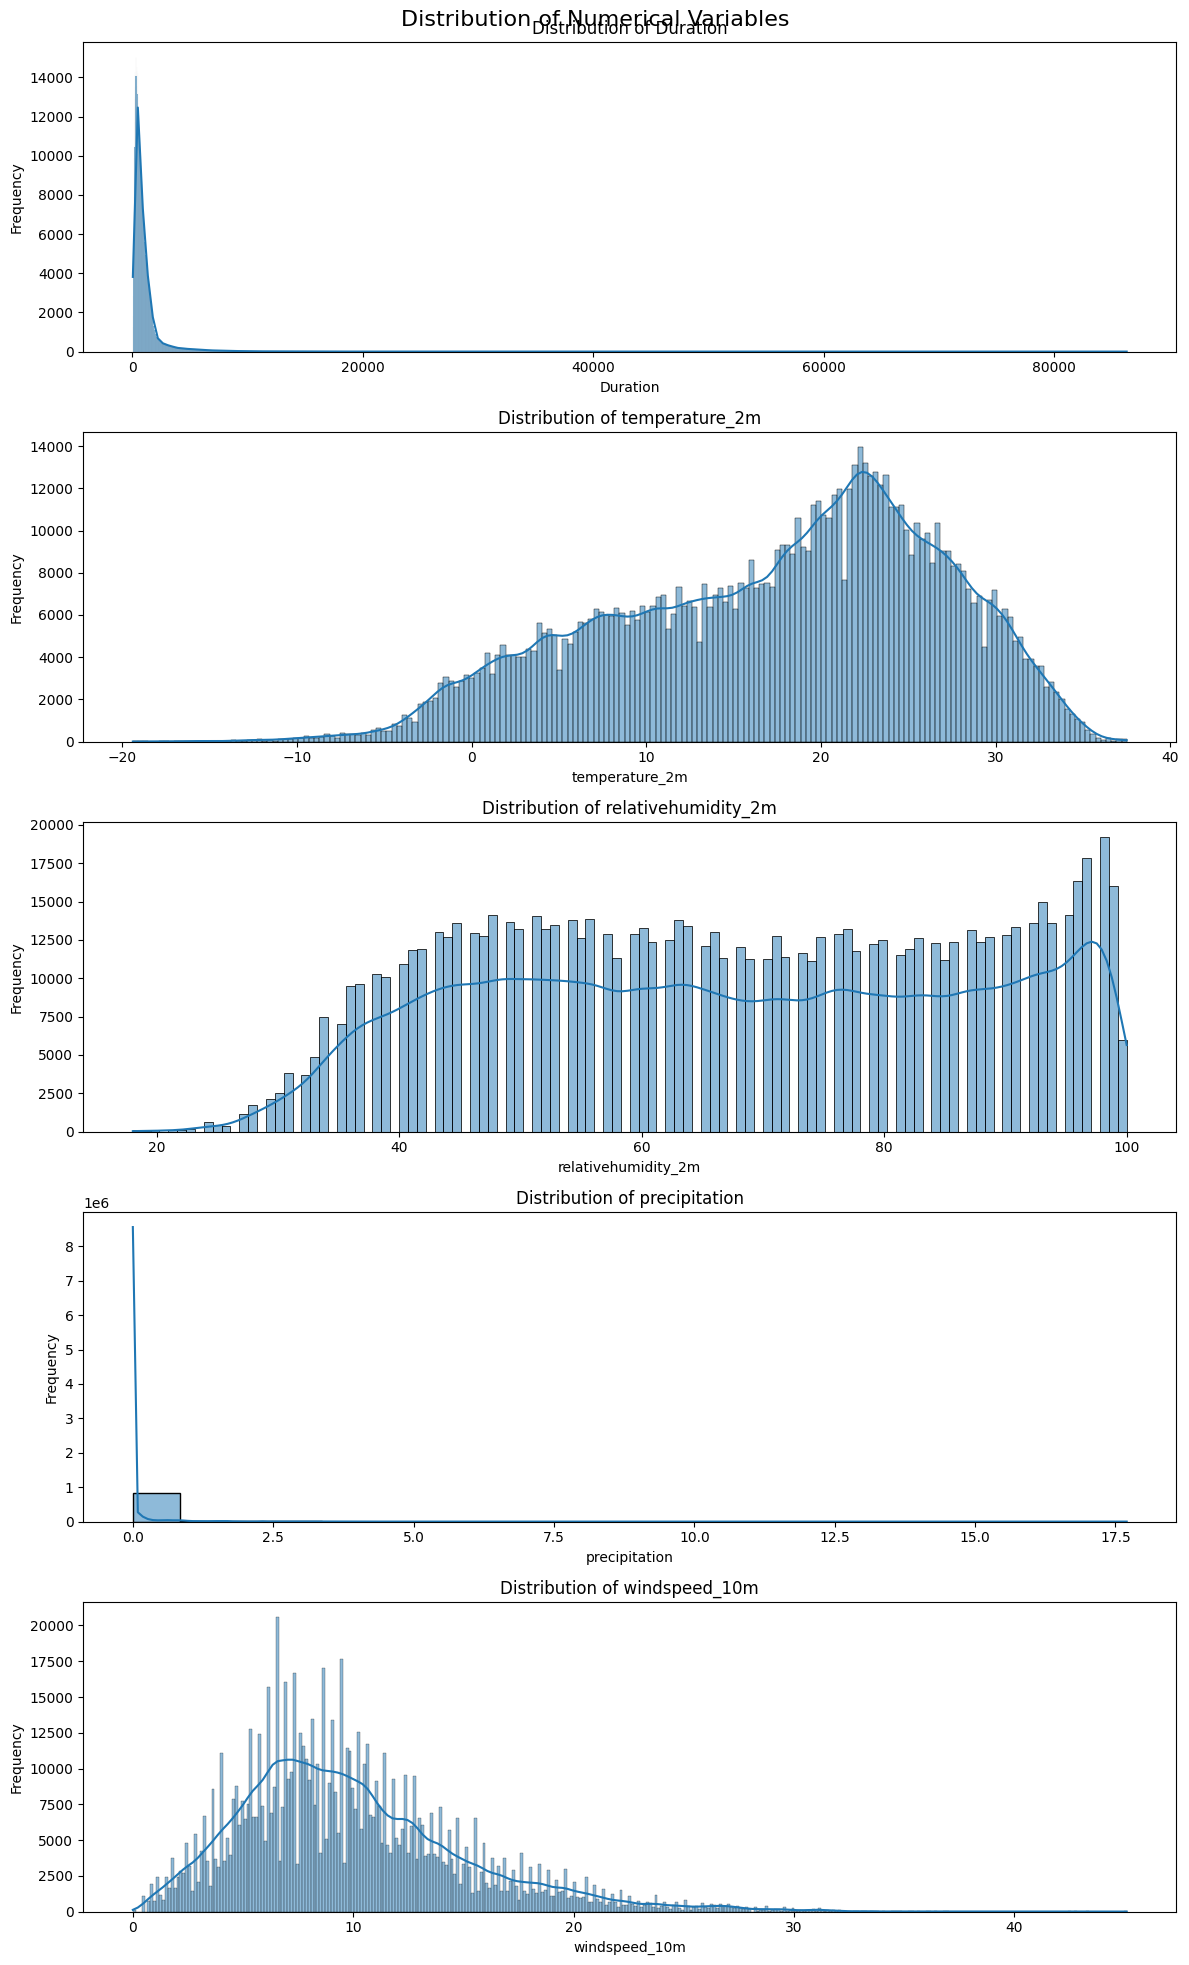

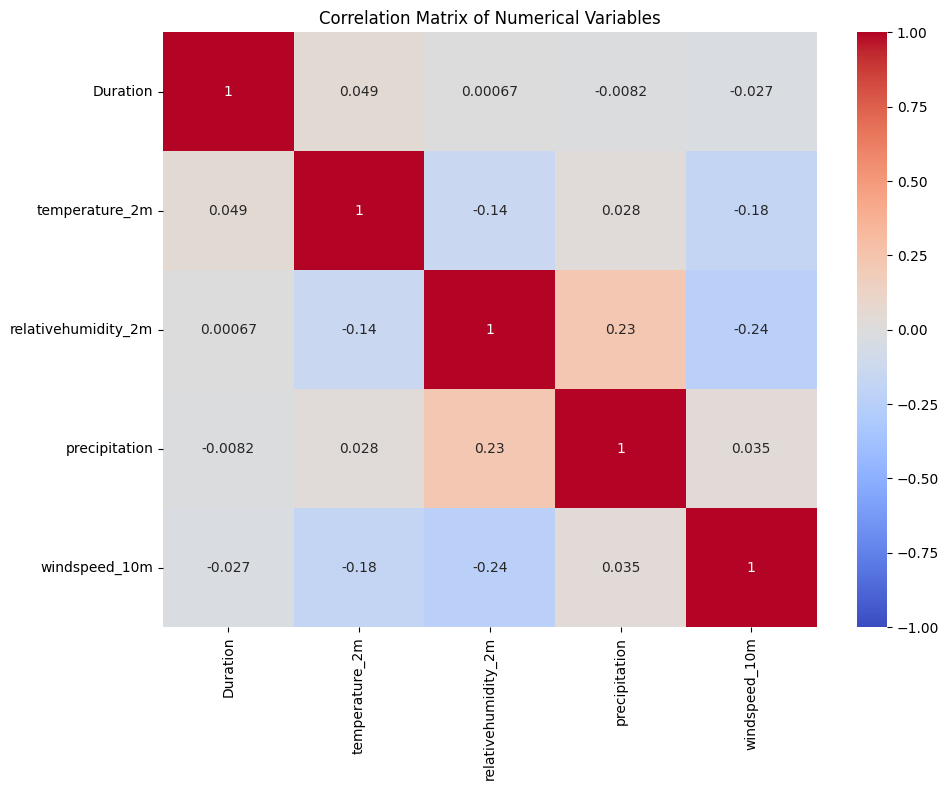

In [9]:
# 5. Descriptive statistics for multiple columns

# Select numerical columns for analysis
numerical_columns = ['Duration', 'temperature_2m', 'relativehumidity_2m', 'precipitation', 'windspeed_10m']

# Calculate descriptive statistics
desc_stats = df[numerical_columns].describe()

# Add mode to the descriptive statistics
desc_stats.loc['mode'] = df[numerical_columns].mode().iloc[0]

# Calculate median absolute deviation (MAD)
desc_stats.loc['mad'] = df[numerical_columns].apply(median_abs_deviation)

# Calculate skewness and kurtosis
desc_stats.loc['skewness'] = df[numerical_columns].skew()
desc_stats.loc['kurtosis'] = df[numerical_columns].kurtosis()

# Display the descriptive statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(desc_stats)

# Visualize the distribution of each numerical column
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(12, 4*len(numerical_columns)))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

for i, column in enumerate(numerical_columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()
